In [1]:
import os
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define the dataset directory
dataset_dir = 'UCMerced_LandUse/Images'

# Define image size and batch size
img_size = (256, 256)
batch_size = 32

In [3]:
# Create a data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1680 images belonging to 21 classes.
Found 420 images belonging to 21 classes.


In [6]:
# Define the model with global average pooling
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(21, activation='softmax'))



Epoch 1/10
52/52 [==============================] - 64s 1s/step - loss: 1.5544 - accuracy: 0.4933 - val_loss: 2.5071 - val_accuracy: 0.2909
Epoch 2/10
52/52 [==============================] - 63s 1s/step - loss: 1.4994 - accuracy: 0.5091 - val_loss: 2.5253 - val_accuracy: 0.2933
Epoch 3/10
52/52 [==============================] - 63s 1s/step - loss: 1.4339 - accuracy: 0.5334 - val_loss: 2.5408 - val_accuracy: 0.3005
Epoch 4/10
52/52 [==============================] - 61s 1s/step - loss: 1.4056 - accuracy: 0.5443 - val_loss: 2.4698 - val_accuracy: 0.2909
Epoch 5/10
52/52 [==============================] - 61s 1s/step - loss: 1.4131 - accuracy: 0.5498 - val_loss: 2.5967 - val_accuracy: 0.3149
Epoch 6/10
52/52 [==============================] - 61s 1s/step - loss: 1.3995 - accuracy: 0.5516 - val_loss: 2.4733 - val_accuracy: 0.3005
Epoch 7/10
52/52 [==============================] - 61s 1s/step - loss: 1.3447 - accuracy: 0.5552 - val_loss: 2.4318 - val_accuracy: 0.3317
Epoch 8/10
52/52 [==

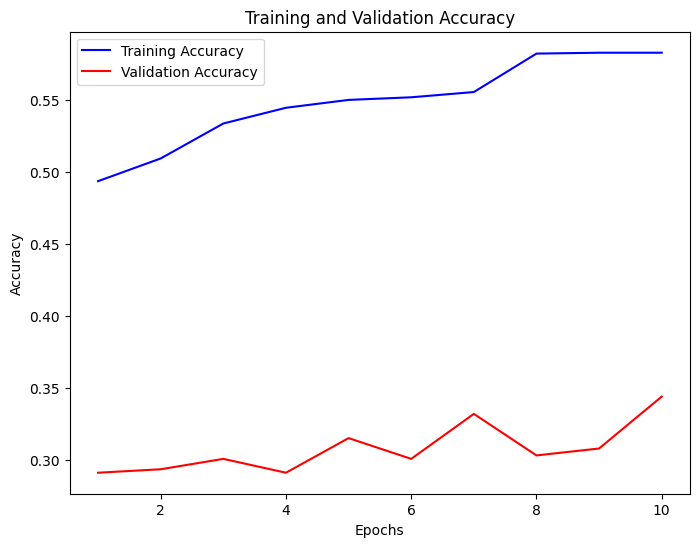

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Get training and validation accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

import numpy as np
import matplotlib.pyplot as plt
# Create an array of epochs
epochs = np.arange(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")